# EDA



## Exploring the Data


In [1]:
import polars as pl
import polars.selectors as cs
import sklearn 
import catboost

import warnings
warnings.filterwarnings('ignore')

In [2]:
# King County House Sales dataset from OpenML (includes Seattle)
# this is an ARFF file, which is a text file with a specific format
url = 'https://www.openml.org/data/download/22044765/dataset'
cols = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month', 'date_day']

raw = pl.read_csv(url, new_columns=cols, skip_rows=31, has_header=False)
raw

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
i64,f64,i64,f64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64
7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,9
5631500400,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2487200875,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
1954400510,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
263000018,360000.0,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
6600060120,400000.0,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23


In [3]:
raw.describe()

statistic,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",4.5803e9,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.40943,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
"""std""",2.8766e9,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
"""min""",1.000102e6,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0,2014.0,1.0,1.0
"""25%""",2.1230e9,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0,2014.0,4.0,8.0
"""50%""",3.9049e9,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0,2014.0,6.0,16.0
"""75%""",7.3089e9,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0,2015.0,9.0,23.0
"""max""",9.9000e9,7.7e6,33.0,8.0,13540.0,1.651359e6,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0,2015.0,12.0,31.0


In [4]:
raw.corr()

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,-0.016762,0.001286,0.00516,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.00813,-0.010842,-0.005151,0.02138,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708,0.001939
-0.016762,1.0,0.30835,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081,-0.01467
0.001286,0.30835,1.0,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.4776,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533,-0.008031
0.00516,0.525138,0.515884,1.0,0.754665,0.08774,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392,-0.005304
-0.012258,0.702035,0.576671,0.754665,1.0,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.19943,0.052529,0.240223,0.75642,0.183286,-0.029038,0.01181,-0.007246
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-0.002901,0.585379,0.391638,0.568634,0.75642,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.73187,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.0,0.183192,-0.021734,0.002449,-0.008539
-0.138798,0.082447,0.029244,0.087175,0.183286,0.718557,-0.011269,0.030703,0.072575,-0.003406,0.119248,0.19405,0.017276,0.070958,0.007854,-0.147221,-0.086419,0.254451,0.183192,1.0,-0.000085,0.003546,-0.002871
0.010128,0.003576,-0.009838,-0.026596,-0.029038,0.005468,-0.022315,-0.004165,0.001364,-0.045589,-0.030387,-0.023823,-0.015687,0.003507,-0.023707,0.001189,-0.029212,0.00027,-0.021734,-0.000085,1.0,-0.782389,-0.006103


In [5]:
(raw
 .to_pandas(use_pyarrow_extension_array=True)
 .corr()
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708,0.001939
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081,-0.014670
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533,-0.008031
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392,-0.005304
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810,-0.007246
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369,0.000634
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005,-0.006662
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132,0.010518
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638,0.011174
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978,-0.004643


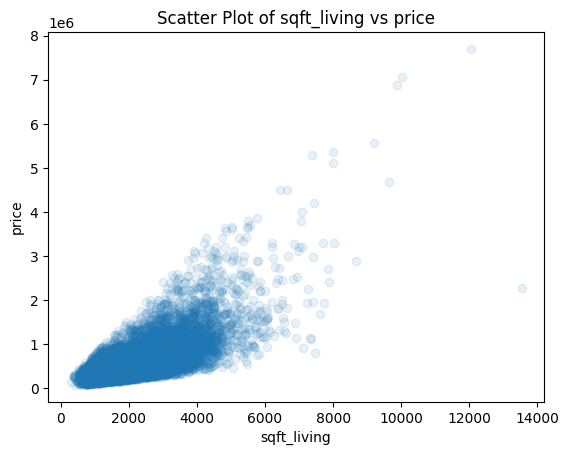

In [8]:
import matplotlib.pyplot as plt

# Konvertieren Sie die Polars-Daten in ein Pandas-DataFrame
df = raw.to_pandas()

# Erstellen Sie den Scatter-Plot
plt.scatter(df['sqft_living'], df['price'], alpha=0.1)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scatter Plot of sqft_living vs price')
plt.show()

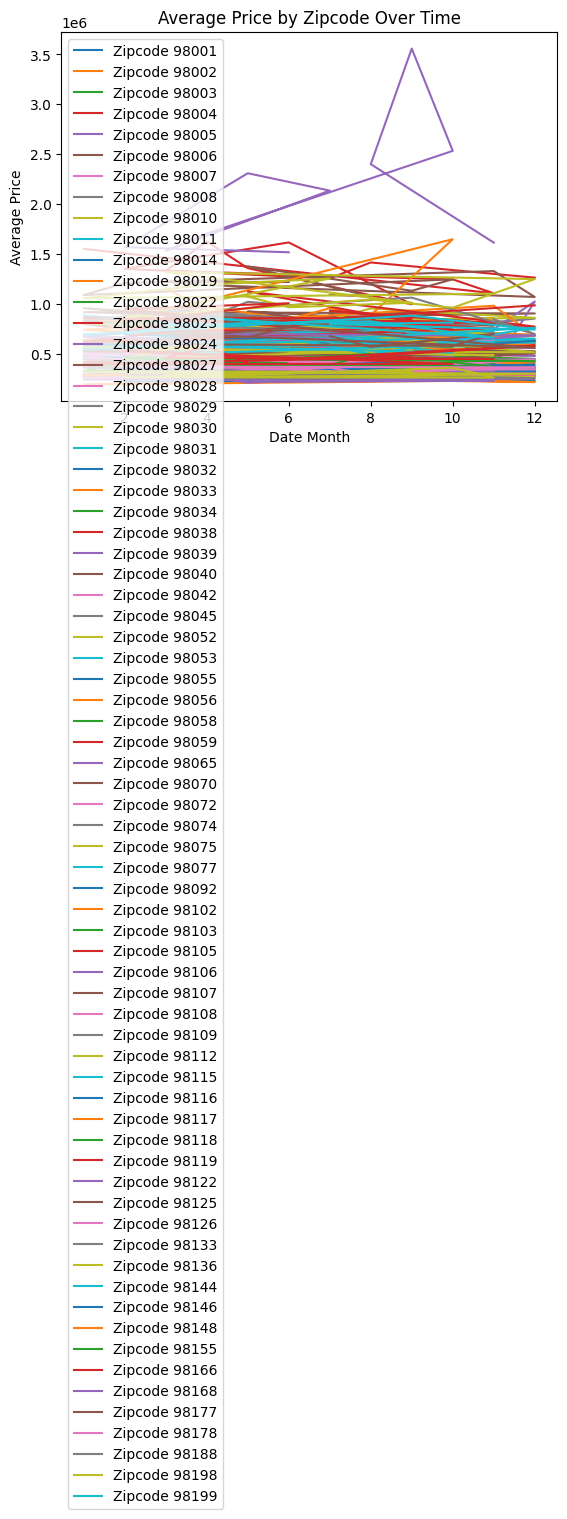

In [15]:
import matplotlib.pyplot as plt

# Gruppieren und Aggregieren der Daten
df = (raw
      .group_by('date_month', 'zipcode')
      .agg(pl.col('price').mean())
      .to_pandas())

# Erstellen des Line-Plots
for zipcode, group in df.groupby('zipcode'):
    plt.plot(group['date_month'], group['price'], label=f'Zipcode {zipcode}')

plt.xlabel('Date Month')
plt.ylabel('Average Price')
plt.title('Average Price by Zipcode Over Time')
plt.legend()
plt.show()

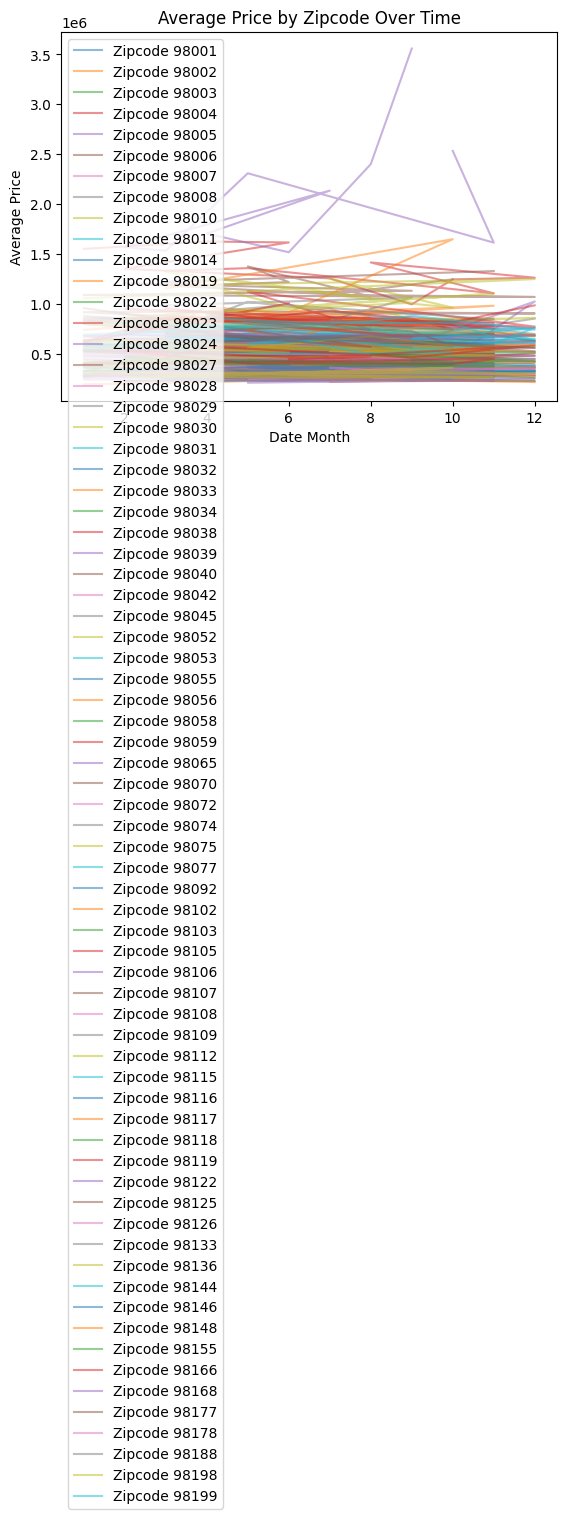

In [19]:
import matplotlib.pyplot as plt

# Gruppieren und Aggregieren der Daten
df = (raw
      .group_by('date_month', 'zipcode')
      .agg(pl.col('price').mean())
      .to_pandas())

# Erstellen des Line-Plots
for zipcode, group in df.groupby('zipcode'):
    plt.plot(group['date_month'], group['price'], label=f'Zipcode {zipcode}', alpha=0.5)

plt.xlabel('Date Month')
plt.ylabel('Average Price')
plt.title('Average Price by Zipcode Over Time')
plt.legend()
plt.show()

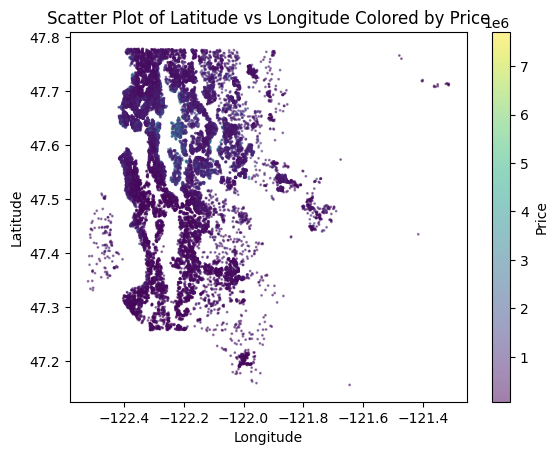

In [22]:
import matplotlib.pyplot as plt

# Konvertieren Sie die Polars-Daten in ein Pandas-DataFrame
df = raw.to_pandas()

# Erstellen des Scatter-Plots
plt.scatter(df['long'], df['lat'], c=df['price'], alpha=0.5, s=1, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude Colored by Price')
plt.colorbar(label='Price')
plt.show()

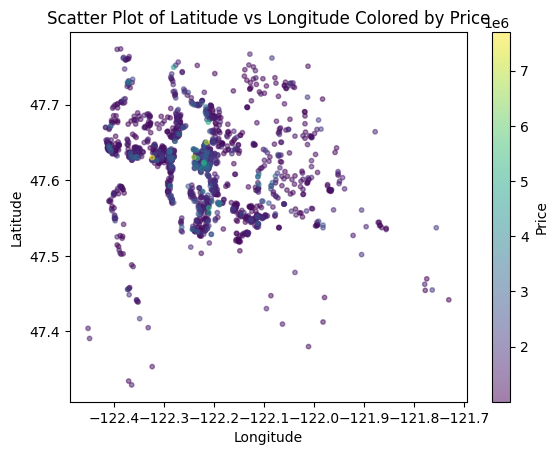

In [28]:
import matplotlib.pyplot as plt

# Konvertieren Sie die Polars-Daten in ein Pandas-DataFrame
df = (raw
      .filter(pl.col('price') > 1_000_000)
      .sort('price')
      .to_pandas())

# Erstellen des Scatter-Plots
plt.scatter(df['long'], df['lat'], c=df['price'], alpha=0.5, s=10, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude Colored by Price')
plt.colorbar(label='Price')
plt.show()


## Data Preprocessing


In [ ]:
def tweak_housing(df):
    return (df
            .with_columns(zipcode=pl.col('zipcode').cast(pl.String).cast(pl.Categorical),
                          date=pl.date(pl.col('date_year'), pl.col('date_month'), pl.col('date_day')),
                          yr_renovated=pl.col('yr_renovated').replace(0, None),
                          )
            .select(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                     'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
                     'sqft_lot15', 'date',  #'date_year', 'date_month', 'date_day', 
                     ])
    )

tweak_housing(raw)
    


## Sklearn Pipelines


In [ ]:
# The difference between sklearn pipelines and transformers is 
# that a pipeline is a sequence of steps. A transformer transforms
# the data, and a pipeline is a sequence of transformers.
# A ColumnTransformer applies multiple transformers to different
# columns of the input data.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
set_config(transform_output='polars')

In [ ]:
print(tweak_housing(raw).select(cs.numeric()).columns)

In [ ]:
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living']
std = StandardScaler()
std.fit_transform(tweak_housing(raw).select(numeric_features))

In [ ]:
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living']

num_pipeline = Pipeline([
     ('std', StandardScaler())])

num_pipeline.fit_transform(
    tweak_housing(raw)
    .select(numeric_features)
)

In [ ]:
# add another step
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std', StandardScaler())])

num_pipeline.fit_transform(
    tweak_housing(raw)
    .select(numeric_features)
)

In [ ]:
cat_features = ['zipcode']

ohe = OneHotEncoder(handle_unknown='ignore')
#                    sparse_output=False)

ohe.fit_transform(
    tweak_housing(raw)
    .select(cat_features)
)

In [ ]:
cat_features = ['zipcode']

ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False)

ohe.fit_transform(
    tweak_housing(raw)
    .select(cat_features)
)

In [ ]:
cat_features = ['zipcode']

ohe = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False, max_categories=10)

ohe.fit_transform(
    tweak_housing(raw)
    .select(cat_features)
)

In [ ]:
cat_features = ['zipcode']

cat_pipeline = Pipeline(steps=[
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

cat_pipeline.set_params(cat__max_categories=10)
cat_pipeline.fit_transform(
    tweak_housing(raw)
    .select(cat_features)
)

In [ ]:
# transformer from a function
tweak_transformer = FunctionTransformer(tweak_housing)

tweak_transformer.fit_transform(raw)

In [ ]:
categorical_features = ['zipcode']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

ct = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',
                              sparse_output=False), categorical_features)])

ct.fit_transform(
    tweak_housing(raw)
    .select([*numeric_features, *cat_features])
)

In [ ]:
# Custom transformer 
class ZipAvgPriceAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        # assume X is a polars dataframe
        self.zip_avg_price = (X
                              .group_by('zipcode')
                              .agg(zip_mean=pl.col('price').mean())
        )
        return self
    
    def transform(self, X, y=None):
        return X.join(self.zip_avg_price, on='zipcode')

zip_adder = ZipAvgPriceAdder()
zip_adder.fit_transform(raw.select(['zipcode', 'price']))

In [ ]:
# make the pipeline
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                    'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zip_mean']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['zipcode']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',
                              sparse_output=False), categorical_features)])

tweak_transformer = FunctionTransformer(tweak_housing)

class ZipAvgPriceAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        # assume X is a polars dataframe
        self.zip_avg_price = (X
                              .group_by('zipcode')
                              .agg(zip_mean=pl.col('price').mean())
        )
        return self
    
    def transform(self, X, y=None):
        return X.join(self.zip_avg_price, on='zipcode')

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ])

X = raw #.drop('price')
y = raw.select('price') # Note sklearn wants a Polars dataframe for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit_transform(raw, raw.select('price'))

In [ ]:
pipe

In [ ]:
# Note sklearn wants a Polars dataframe for y
X = raw #.drop('price')
y = raw.select('price') 
#y = raw['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Challenge

Make a plot to explore the relationship between the number of bedrooms and the price of the house.


## Solution

# Model Creation



## Dummy Model


In [ ]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
dummy_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('dummy', dummy),
                      ])

dummy_pipe.fit(X_train, y_train)
dummy_pipe.score(X_test, y_test)

In [ ]:
dummy_pipe

In [ ]:
dummy_pipe.predict(X_test)


## Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression


lr =  LinearRegression()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
lr_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                        ('lr', lr),
                      ])

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

In [ ]:
lr_pipe.predict(X_test)


## Decision Trees


In [ ]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('dt', dt),
                      ])

dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

In [ ]:
dt_pipe.set_params(dt__max_depth=1)
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

In [ ]:
dt_pipe.set_params(dt__max_depth=9)
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)


## CatBoost


In [ ]:
from catboost import CatBoostRegressor


cat = CatBoostRegressor()
# has issues with Polars input going to use a pandas_transformer
def to_pandas(df):
    return df.to_pandas()
pandas_transformer = FunctionTransformer(to_pandas)

y = raw.select('price')

X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
cat_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('to_pandas', pandas_transformer),
                      ('cat', cat), 
                      ])

cat_pipe.fit(X_train, y_train.to_numpy()[:,0])
cat_pipe.score(X_test, y_test.to_numpy()[:,0])


## Challenge

Create a pipeline for a Random Forest model and train it on the data. (see `ensemble.RandomForestRegressor` in scikit-learn). What is the score?



## Solution

# Evaluation



## R2


The Coefficient of Determination, R2, is a measure of how well the model fits the data. It is a value between 0 and 1. It tells us how much of the variance in the target variable is predictable from the features.

A value of 0 means that the model explains none of the variability. A value of 1 means that the model explains all the variability.

Note that it doesn't indicate whether a model is overfitting or underfitting the data.

In [ ]:
cat_pipe.score(X_test, y_test.to_numpy()[:,0])


## Mean Squared/Absolute Error


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, cat_pipe.predict(X_test))

In [ ]:
# rmse
mean_squared_error(y_test, cat_pipe.predict(X_test), squared=False)

In [ ]:
# absolute error
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, cat_pipe.predict(X_test))

In [ ]:
# compare to lr model
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, lr_pipe.predict(X_test))


## Residuals Plot


In [ ]:
# make a residual plot
import matplotlib.pyplot as plt

ax = plt.scatter(cat_pipe.predict(X_test), 
    y_test.to_series().to_numpy() - cat_pipe.predict(X_test), alpha=0.1)
# make labels not be scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.ylim(-500_000, 500_000)
plt.xlabel('Predicted price')
plt.ylabel('Residual')
plt.title('Residual plot')

In [ ]:
# plot with Polars
(y_test
 .with_columns(predicted_price=cat_pipe.predict(X_test),
   residual=y_test.to_series().to_numpy() - cat_pipe.predict(X_test))
 .plot.scatter('predicted_price', 'residual', alpha=0.1, yformatter='$%.0f',
               xformatter='$%.0f')
 )

In [ ]:
def residuals_plot(model, X_train, y_train, X_test, y_test):
    return (y_test
      .with_columns(prediction=model.predict(X_test),
        residual=y_test.to_series().to_numpy() - model.predict(X_test),
        type=pl.lit('test'))
      .vstack(y_train
        .with_columns(prediction=model.predict(X_train),
          residual=y_train.to_series().to_numpy() - model.predict(X_train),
          type=pl.lit('train'))
              )
      .reverse()
      .plot.scatter('prediction', 'residual', alpha=0.1, yformatter='$%.0f',
                    xformatter='$%.0f', by='type')
 )

residuals_plot(cat_pipe, X_train, y_train, X_test, y_test)

In [ ]:
residuals_plot(dt_pipe, X_train, y_train, X_test, y_test)

## Challenge

What is the mean squared error of the Random Forest model? What is the R2 score? What do these values tell us about the model?



## Solution

# Model Tuning



## Hyperparameters

Hyperparameters are the levers we can pull to adjust the behavior of a model. They are set before the model is trained and remain constant during training.


## Tuning Linear Regression


In [ ]:
lr_pipe

In [ ]:
lr_pipe.named_steps['lr']

In [ ]:
help(lr_pipe.named_steps['lr'])

In [ ]:
from sklearn.linear_model import Ridge
Ridge?

In [ ]:
rr =  Ridge()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
rr_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                        ('rr', rr),
                      ])

rr_pipe.fit(X_train, y_train)
rr_pipe.score(X_test, y_test)

In [ ]:
lr_pipe.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [0, .01, .05, .1, .5, 1, 2]
scores = []
for val in param_range:
    rr_pipe.set_params(rr__alpha=val)
    rr_pipe.fit(X_train, y_train)
    scores.append(rr_pipe.score(X_test, y_test))

In [ ]:
# Our be score is at 0 (which is normal Linear Regression)
alpha = pl.DataFrame({'val': param_range,
              'scores': scores})
alpha.plot(x='val', y='scores')


## Tuning Decision Trees


In [ ]:
dt_pipe.named_steps['dt']

In [ ]:
help(dt_pipe.named_steps['dt'])

In [ ]:
# plot a validation curve tracking mse as the max_depth of the decision tree increases
from sklearn.model_selection import validation_curve

param_range = range(1, 20)
train_scores, test_scores = validation_curve(
    dt_pipe, X_train, y_train, param_name="dt__max_depth", param_range=param_range,
    scoring="neg_mean_squared_error", n_jobs=1)

In [ ]:
# make a validation curve from train_scores and test_scores
import matplotlib.pyplot as plt
import numpy as np

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
#plt.ylim(-1, 0)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                color="navy", lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,   
                    test_scores_mean + test_scores_std, alpha=0.2,
                    color="navy", lw=lw)
plt.legend(loc="best")




In [ ]:
# train dt_pipe with max_depth=8
dt8_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                        ('zip_avg_price', ZipAvgPriceAdder()),
                        ('to_pandas', pandas_transformer),
                        ('preprocessor', preprocessor),
                        ('dt', DecisionTreeRegressor(max_depth=8)),
                        ])

dt8_pipe.fit(X_train, y_train)
dt8_pipe.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt8_pipe.predict(X_test), squared=False) 

In [ ]:
dt_pipe.score(X_test, y_test)

In [ ]:
mean_squared_error(y_test, dt_pipe.predict(X_test), squared=False) 


## Tuning CatBoost

* Boosting - `iterations` (`num_trees`, `n_estimators`), `learning_rate` (`eta`), `early_stopping_rounds`

* Tree based - `depth` (`max_depth`), `grow_policy`, `min_child_samples` (`min_data_in_leaf`), `max_leaves` (`num_leaves`)

* Sampling - `subsample`, `sampling_frequency`, `rsm` (`colsample_bylevel`), `random_strength`, `bagging_temperature`

* Regularization - `l2_leaf_reg` (`reg_lambda`), `model_shrink_rate`

* Constraints - `monotone_constraints`, `feature_weights`

In [ ]:
catboost.CatBoostRegressor?

In [ ]:
cr2 = catboost.CatBoostRegressor(iterations=3000, learning_rate=0.1,
                                 early_stopping_rounds=10)
X_train, X_test, y_train, y_test = train_test_split(raw.drop('price'), y, 
                                                    test_size=0.2, random_state=42)

cr2.fit(X_train.to_pandas(), y_train.to_numpy(), cat_features=['zipcode'], verbose=100,
        early_stopping_rounds=10, eval_set=(X_test.to_pandas(), y_test.to_numpy()))

In [ ]:
# plot a validation curve tracking mse as the max_depth of the decision tree increases
from sklearn.model_selection import validation_curve

param_range = range(1, 10)
train_scores, test_scores = validation_curve(
    cr2, X_train.to_pandas(), y_train.to_numpy(), param_name="max_depth", 
    param_range=param_range,
    scoring="neg_mean_squared_error", n_jobs=1,
    fit_params=dict(early_stopping_rounds=10, 
                    eval_set=(X_test.to_pandas(), y_test.to_numpy())))

In [ ]:
# make a validation curve from train_scores and test_scores
import matplotlib.pyplot as plt
import numpy as np

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with CatBoost")
plt.xlabel("max_depth")
plt.ylabel("Score")
#plt.ylim(-1, 0)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                color="navy", lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,   
                    test_scores_mean + test_scores_std, alpha=0.2,
                    color="navy", lw=lw)
plt.legend(loc="best")




In [ ]:
# set max_depth to 4
cr2_4 = catboost.CatBoostRegressor(iterations=3000, learning_rate=0.1,
                                max_depth=4)

X_train, X_test, y_train, y_test = train_test_split(raw.drop('price'), y, 
                                                    test_size=0.2, random_state=42)

cr2_4.fit(X_train.to_pandas(), y_train.to_numpy(), cat_features=['zipcode'], verbose=100,
        early_stopping_rounds=10, eval_set=(X_test.to_pandas(), y_test.to_numpy()))
cr2_4.score(X_test.to_pandas(), y_test.to_numpy())


## Grid Search


In [ ]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('dt', dt),
                      ])

dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

In [ ]:
dt_pipe

In [ ]:
# use grid search on decision tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'dt__max_depth': [3, 6, 9],
    'dt__min_samples_split': [10, 20, 100],
    'dt__min_samples_leaf': [10, 20, 100],
}

grid_search = GridSearchCV(dt_pipe, param_grid, cv=5)#, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# make a tree from the params
dt = DecisionTreeRegressor()#max_depth=9, min_samples_leaf=20, min_samples_split=10)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('to_pandas', pandas_transformer),
                      ('preprocessor', preprocessor),
                        ('dt', dt),
                      ])
dt_pipe.set_params(**grid_search.best_params_)
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)

In [ ]:
# compare to default
dt = DecisionTreeRegressor(random_state=42)
dt_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('to_pandas', pandas_transformer),
                      ('preprocessor', preprocessor),
                        ('dt', dt),
                      ])

dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test)


## Challenge

Do a grid search to find the best depth for the random forest model. What is the best depth? What is the score of the model with the best depth?


## Solution

# Model Deployment



## End to end notebook


In [ ]:
import polars as pl
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config
set_config(transform_output='polars')

def tweak_housing(df):
    return (df
            .with_columns(zipcode=pl.col('zipcode').cast(pl.String).cast(pl.Categorical),
                          date=pl.date(pl.col('date_year'), pl.col('date_month'), pl.col('date_day')),
                          yr_renovated=pl.col('yr_renovated').replace(0, None),
                          )
            .select(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                     'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
                     'sqft_lot15', 'date',  #'date_year', 'date_month', 'date_day', 
                     ])
    )

# make the pipeline
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                    'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zip_mean']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['zipcode']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',
                              sparse_output=False), categorical_features)])

def to_pandas(df):
    return df.to_pandas()
pandas_transformer = FunctionTransformer(to_pandas)

tweak_transformer = FunctionTransformer(tweak_housing)

class ZipAvgPriceAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        # assume X is a polars dataframe
        self.zip_avg_price = (X
                              .group_by('zipcode')
                              .agg(zip_mean=pl.col('price').mean())
        )
        return self
    
    def transform(self, X, y=None):
        with pl.StringCache():
            return X.join(self.zip_avg_price, on='zipcode')


# King County House Sales dataset from OpenML (includes Seattle)
# this is an ARFF file, which is a text file with a specific format
url = 'https://www.openml.org/data/download/22044765/dataset'
cols = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month', 'date_day']

raw = pl.read_csv(url, new_columns=cols, skip_rows=31, has_header=False)

lr =  LinearRegression()
y = raw.select('price')
X_train, X_test, y_train, y_test = train_test_split(raw, y, test_size=0.2, random_state=42)
lr_pipe = Pipeline(steps=[('tweak', tweak_transformer),
                      ('zip_avg_price', ZipAvgPriceAdder()),
                      ('preprocessor', preprocessor),
                      ('lr', lr),
                      ])

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)
    

## Using MLFlow

Going to show how to persist and load a model, but can also:

- Start a endpoint to serve predictions
- Build a Docker image


In [ ]:
import mlflow

In [ ]:
mlflow.__version__

In [ ]:
model_info = mlflow.sklearn.log_model(lr_pipe, artifact_path='lr_pipe')

In [ ]:
model_info.artifact_path    

In [ ]:
!tree

In [ ]:
model_info.run_id

In [ ]:
model = mlflow.pyfunc.load_model(f'mlruns/0/{model_info.run_id}/artifacts/lr_pipe')

In [ ]:
model

In [ ]:
model.predict(X_test)

## Challenge

Reformat your notebook so that you can load the data and create an optimized random forest model in a single cell. Then, use MLFlow to log the model and its parameters.


## Solution